In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
gpus = tf.config.list_physical_devices(device_type='GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(device=gpu, enable=True)   
#GPU内存管理

In [3]:
train_dir = 'sat2/train'
test_dir = 'sat2/val'

im_size = 224
batch_size = 32

In [4]:
train_images = ImageDataGenerator(rescale = 1/255,horizontal_flip=True)
test_images = ImageDataGenerator(rescale = 1/255)
#归一化

In [5]:
train_gen = train_images.flow_from_directory(directory=train_dir,
                                             batch_size=batch_size,
                                             shuffle=True,
                                             target_size=(im_size, im_size),
                                             class_mode='categorical')
#按路径载入图片，批处理大小，随机，尺寸，读热编码

Found 3150 images belonging to 5 classes.


In [6]:
val_gen = test_images.flow_from_directory(directory=test_dir,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          target_size=(im_size, im_size),
                                          class_mode='categorical')
#按路径载入图片，批处理大小，随机，尺寸，读热编码

Found 350 images belonging to 5 classes.


In [7]:
classes = train_gen.class_indices
#类别查看

In [8]:
classes

{'airplane': 0, 'bridge': 1, 'palace': 2, 'ship': 3, 'stadium': 4}

In [9]:
model = tf.keras.Sequential()
#VGG-11/16

In [10]:
model.add(tf.keras.layers.Conv2D(input_shape=(224,224,3),
                                 filters = 64,
                                 kernel_size = (3,3),
                                 padding = 'same',
                                 activation = "relu"))
# model.add(tf.keras.layers.Conv2D(input_shape=(224,224,3),
#                                  filters = 64,
#                                  kernel_size = (3,3),
#                                  padding = 'same',
#                                  activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(tf.keras.layers.Conv2D(input_shape=(224,224,3),
                                 filters = 128,
                                 kernel_size = (3,3),
                                 padding = 'same',
                                 activation = "relu"))
# model.add(tf.keras.layers.Conv2D(input_shape=(224,224,3),
#                                  filters = 128,
#                                  kernel_size = (3,3),
#                                  padding = 'same',
#                                  activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(tf.keras.layers.Conv2D(input_shape=(224,224,3),
                                 filters = 256,
                                 kernel_size = (3,3),
                                 padding = 'same',
                                 activation = "relu"))
model.add(tf.keras.layers.Conv2D(input_shape=(224,224,3),
                                 filters = 256,
                                 kernel_size = (3,3),
                                 padding = 'same',
                                 activation = "relu"))
# model.add(tf.keras.layers.Conv2D(input_shape=(224,224,3),
#                                  filters = 256,
#                                  kernel_size = (1,1),
#                                  padding = 'same',
#                                  activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(tf.keras.layers.Conv2D(input_shape=(224,224,3),
                                 filters = 512,
                                 kernel_size = (3,3),
                                 padding = 'same',
                                 activation = "relu"))
model.add(tf.keras.layers.Conv2D(input_shape=(224,224,3),
                                 filters = 512,
                                 kernel_size = (3,3),
                                 padding = 'same',
                                 activation = "relu"))
# model.add(tf.keras.layers.Conv2D(input_shape=(224,224,3),
#                                  filters = 512,
#                                  kernel_size = (1,1),
#                                  padding = 'same',
#                                  activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(tf.keras.layers.Conv2D(input_shape=(224,224,3),
                                 filters = 512,
                                 kernel_size = (3,3),
                                 padding = 'same',
                                 activation = "relu"))
model.add(tf.keras.layers.Conv2D(input_shape=(224,224,3),
                                 filters = 512,
                                 kernel_size = (3,3),
                                 padding = 'same',
                                 activation = "relu"))
# model.add(tf.keras.layers.Conv2D(input_shape=(224,224,3),
#                                  filters = 512,
#                                  kernel_size = (1,1),
#                                  padding = 'same',
#                                  activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
#model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
#model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 256)       590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 256)       0

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['acc'])
#学习率设置

In [13]:
history = model.fit(train_gen,epochs=10,validation_data=val_gen)

Epoch 1/10
99/99 [==============================] - 18s 129ms/step - loss: 1.5624 - acc: 0.2524 - val_loss: 1.3501 - val_acc: 0.4057
Epoch 2/10
99/99 [==============================] - 8s 84ms/step - loss: 1.2805 - acc: 0.4011 - val_loss: 1.1643 - val_acc: 0.5057
Epoch 3/10
99/99 [==============================] - 9s 85ms/step - loss: 1.1841 - acc: 0.4812 - val_loss: 1.0562 - val_acc: 0.5257
Epoch 4/10
99/99 [==============================] - 9s 86ms/step - loss: 1.0522 - acc: 0.5612 - val_loss: 0.9623 - val_acc: 0.6343
Epoch 5/10
99/99 [==============================] - 9s 86ms/step - loss: 0.9111 - acc: 0.6534 - val_loss: 0.8300 - val_acc: 0.6886
Epoch 6/10
99/99 [==============================] - 9s 86ms/step - loss: 0.7861 - acc: 0.7140 - val_loss: 0.8395 - val_acc: 0.7171
Epoch 7/10
99/99 [==============================] - 8s 85ms/step - loss: 0.6960 - acc: 0.7554 - val_loss: 0.7367 - val_acc: 0.7257
Epoch 8/10
99/99 [==============================] - 8s 84ms/step - loss: 0.6283 -

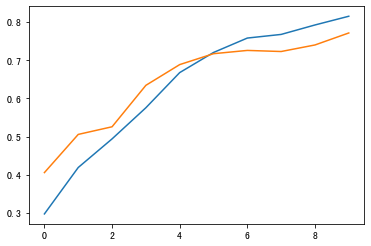

In [14]:
plt.plot(history.epoch,history.history.get('acc'))
plt.plot(history.epoch,history.history.get('val_acc'))

In [15]:
model.evaluate(val_gen)

11/11 [==============================] - 1s 66ms/step - loss: 0.6701 - acc: 0.7714


[0.6701164245605469, 0.7714285850524902]

In [16]:
# 保存模型
model.save('sat3.h5')